In [3]:
# !pip install yfinance requests beautifulsoup4 matplotlib pandas

In [12]:
# pip install selenium


<h3> 1. Extracting Tesla Stock Data</h3>

In [2]:
import yfinance as yf

# Extract Tesla stock data
tesla_data = yf.download('TSLA', start='2010-01-01', end='2023-12-31')

# Reset the index and display the first five rows
tesla_data.reset_index(inplace=True)
print(tesla_data.head())


[*********************100%%**********************]  1 of 1 completed

        Date      Open      High       Low     Close  Adj Close     Volume
0 2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
1 2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
2 2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
4 2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500


<h3> 2: Extracting Tesla Revenue Data Using Webscraping</h3>

In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the page to scrape
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'

# Send a GET request to the URL
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Look for tables in the page
tables = soup.find_all('table')

# Check if we found any tables
if len(tables) == 0:
    print("No tables found on the page.")
else:
    # Find the correct table containing revenue data
    for table in tables:
        try:
            df = pd.read_html(str(table))[0]
            if 'Revenue' in df.columns:
                tesla_revenue = df
                break
        except ValueError:
            continue

    if 'tesla_revenue' in locals():
        print(tesla_revenue.tail())
    else:
        print("No revenue table found.")


No tables found on the page.


<h3> 3: Extracting GameStop Stock Data</h3>

In [5]:
# Extract GameStop stock data
gme_data = yf.download('GME', start='2010-01-01', end='2023-12-31')

# Reset the index and display the first five rows
gme_data.reset_index(inplace=True)
print(gme_data.head())


[*********************100%%**********************]  1 of 1 completed

        Date    Open    High     Low   Close  Adj Close     Volume
0 2010-01-04  5.5175  5.7375  5.5000  5.7250   3.854643   26702800
1 2010-01-05  5.7275  5.9350  5.7250  5.8800   3.959006   21269600
2 2010-01-06  5.8650  6.0250  5.8050  6.0075   4.044850   21471200
3 2010-01-07  5.0025  5.2925  4.8550  5.1150   3.443931  164761200
4 2010-01-08  5.1600  5.3075  5.0575  5.0725   3.415315   47872400


<h3> 4: Extracting GameStop Revenue Data</h3>

In [10]:
# URL of the page to scrape
url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'

# Send a GET request to the URL
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Look for tables in the page
tables = soup.find_all('table')

# Check if we found any tables
if len(tables) == 0:
    print("No tables found on the page.")
else:
    # Find the correct table containing revenue data
    for table in tables:
        try:
            df = pd.read_html(str(table))[0]
            if 'Revenue' in df.columns:
                gme_revenue = df
                break
        except ValueError:
            continue

    if 'gme_revenue' in locals():
        print(gme_revenue.tail())
    else:
        print("No revenue table found.")


No tables found on the page.


<h3> 5: Tesla Stock and Revenue Dashboard </h3>

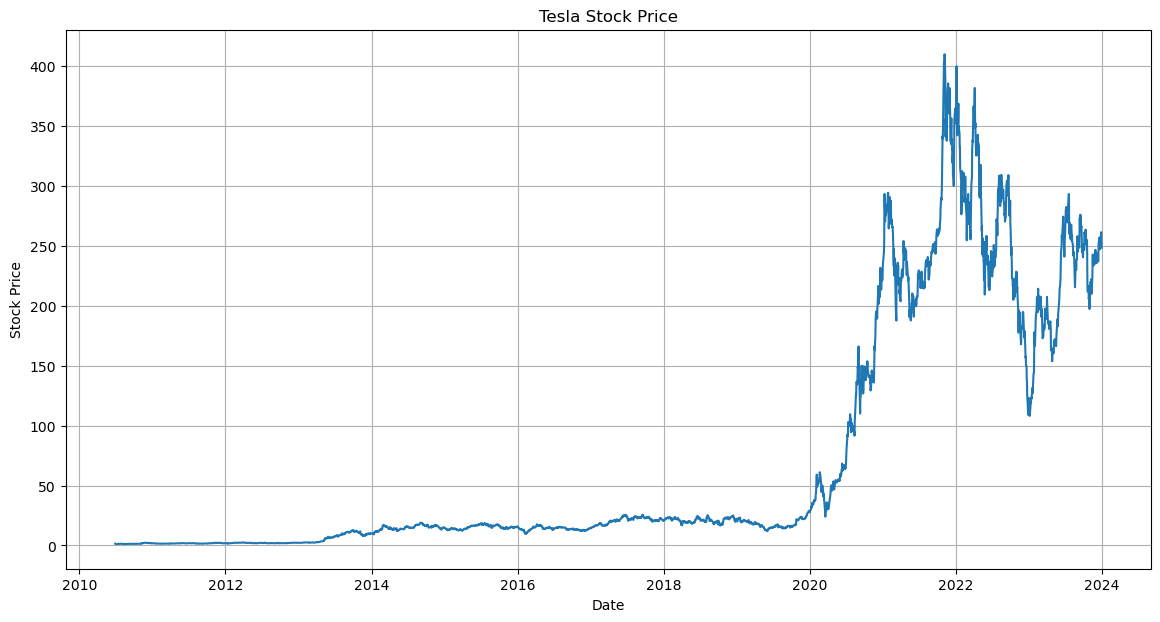

In [14]:
import matplotlib.pyplot as plt

def plot_stock_data(stock_data, stock_title):
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data['Date'], stock_data['Close'], color='tab:blue')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title(stock_title)
    plt.grid(True)
    plt.show()

# Ensure the date columns are datetime objects
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])

# Plot Tesla stock data
plot_stock_data(tesla_data, 'Tesla Stock Price')


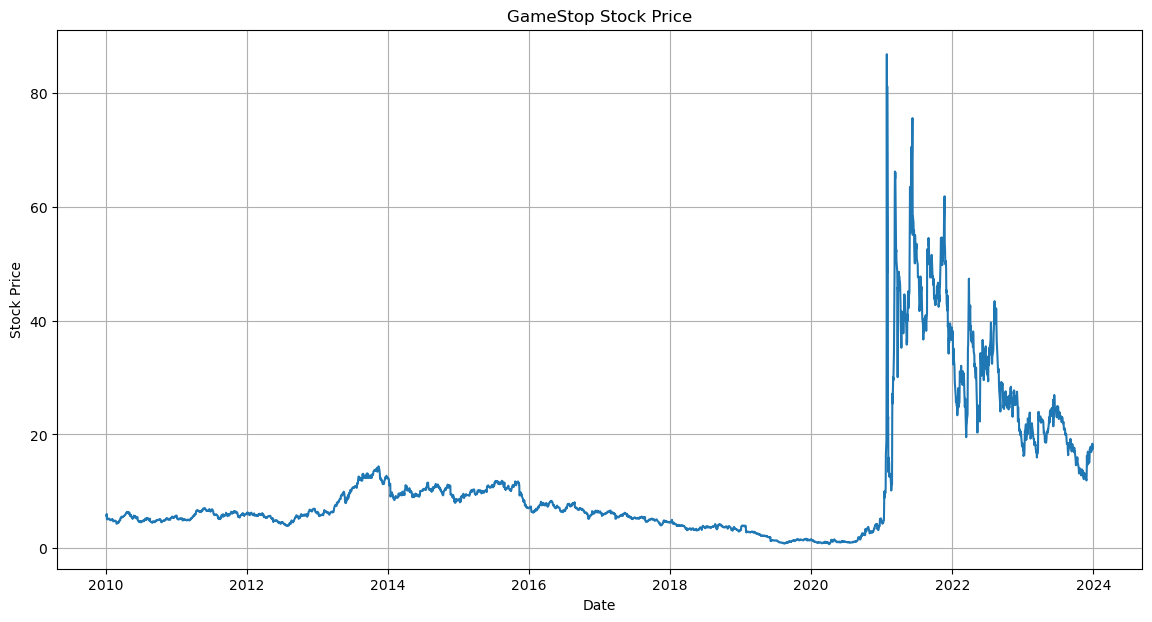

In [15]:
# Ensure the date columns are datetime objects
gme_data['Date'] = pd.to_datetime(gme_data['Date'])

# Plot GameStop stock data
plot_stock_data(gme_data, 'GameStop Stock Price')
